Import the modules that will be used.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

$\textit{ANSWER HERE}:$

Dot product between two vectors: <br>
- for loop: $O(n)$;  <br>
- multiplying: $O(1)$ <br>
- Overall: $O(n)$ <br>

Matrix-vector product: <br>
- for loop: $O(n \times n) = O(n^2)$ <br>
- multiplying: $O(1)$ <br>
- Overall: $O(n^2)$ <br>

Matrix-matrix product: <br>
- for loop: $O(n \times n) = O(n^2)$ <br>
- loop for adding elements: $O(n)$ <br>
- multiplying: $O(1)$ <br>
- Overall: $O(n^3)$ <br>


In [90]:
"My own functions of vv/vm/mm multiplication"

def vv_dot(x,y):
    z = 0
    if len(x) != len(y):
        raise ValueError("Cannot multiply vector of dimension {} with vector of dimension {}".format(len(x), len(y)))
    for i in range(len(x)):
        z += x[i]*y[i]
    return z

def mv_dot(m,v):
    z = []
    if len(m[0]) != len(v):
        raise ValueError("Incorrect dimensions")
    for i in range(len(m)):
        n = 0
        for j in range(len(v)):
            n += m[i][j] * v[j]
        z.append(n)
    return z
            
def mm_dot(x,y):
    z = np.zeros([len(x), len(y[0])])
    if len(x[0]) != len(y):
        raise ValueError("Incorrect dimensions")
    for i in range(len(x)):
        for j in range(len(y[0])):
            for k in range(len(y)):
                z[i][j] += x[i][k]*y[k][j]
    return z

In [107]:
"Testing the above functions"
import pytest

# vv_dot - tests for valid and invalid cases
assert vv_dot([2,3,4], [3,4,5]) == 6+12+20
with pytest.raises(ValueError):
    vv_dot([2,3,4], [3,4])

# mv_dot - tests for valid and invalid cases
assert mv_dot([[1,1],[1,1]], [2,3])
with pytest.raises(ValueError):
    vv_dot(([2,3],[2,4]), [3,4,5])

# mm_dot - tests for valid and invalid cases
assert np.all( mm_dot(([1,0],[0,1]),([1,0],[0,1])) == [[1, 0],[0, 1]] )
assert np.all( mm_dot(([2,0],[0,2]),([0,1,1,0],[0,0,1,1])) == ([0,2,2,0],[0,0,2,2]) )
with pytest.raises(TypeError):
    mm_dot([2,3,4], [3,4,5])
with pytest.raises(TypeError):
    mm_dot([[1,1],[1,1]], [2,3])

# Making sure my implementations are the same as numpy's implementations of the products
assert np.all(vv_dot([2,3,4], [3,4,5]) == np.dot([2,3,4], [3,4,5]))
assert np.all(mv_dot(([2,3],[2,4]),[3,4]) == np.dot(([2,3],[2,4]),[3,4]))
assert np.all(mm_dot(([2,0],[0,2]),([0,1,1,0],[0,0,1,1])) == np.dot(([2,0],[0,2]),([0,1,1,0],[0,0,1,1])) )

In [124]:
"Timing all the times"
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 7)
 
# Create an array of random numbers
v1 = np.random.rand(N[-1])
v2 = np.random.rand(N[-1])
m1 = np.random.rand(N[-1],N[-1])
m2 = np.random.rand(N[-1],N[-1])

# Time the different implementations
mvv_times = []
mmv_times = []
mmm_times = []
pvv_times = []
pmv_times = []
pmm_times = []
for n in N:
    # Time my vector-vector product
    t = %timeit -n3 -q -o vv_dot(v1[:n],v2[:n])
    mvv_times.append(t.best)
    
    # Time my matrix-vector product
    t = %timeit -n3 -q -o mv_dot(m1[:n, :n], v1[:n])
    mmv_times.append(t.best)

    # Time my matrix-matrix product
    t = %timeit -n3 -q -o mm_dot(m1[:n, :n], m2[:n, :n])
    mmm_times.append(t.best)
    
    # Time python's vector-vector product
    t = %timeit -n3 -q -o np.dot(v1[:n],v2[:n])
    pvv_times.append(t.best)
    
    # Time python's matrix-vector product
    t = %timeit -n3 -q -o np.dot(m1[:n, :n], v1[:n])
    pmv_times.append(t.best)

    # Time python's matrix-matrix product
    t = %timeit -n3 -q -o np.dot(m1[:n, :n], m2[:n, :n])
    pmm_times.append(t.best)

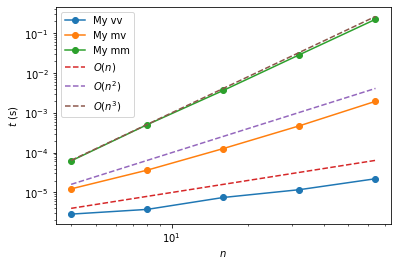

In [125]:
# Plot time taken for my implementations
plt.loglog(N, mvv_times, marker='o', label='My vv')
plt.loglog(N, mmv_times, marker='o', label='My mv')
plt.loglog(N, mmm_times, marker='o', label='My mm')

# Show reference line of O(n) and O(n^2)
plt.loglog(N, 1.0e-6*N, '--', label=r'$O(n)$')
plt.loglog(N, 1.0e-6*N**2, '--',  label=r'$O(n^2)$')
plt.loglog(N, 1.0e-6*N**3, '--',  label=r'$O(n^3)$')

# Add labels and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc=0)

plt.show()

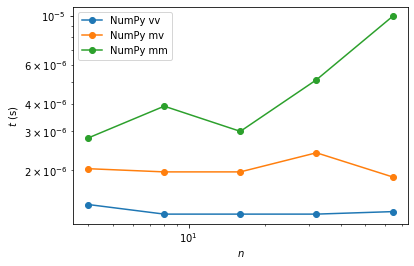

In [127]:
# Plot time taken for numpy's implementations
plt.loglog(N, pvv_times, marker='o', label='NumPy vv')
plt.loglog(N, pmv_times, marker='o', label='NumPy mv')
plt.loglog(N, pmm_times, marker='o', label='NumPy mm')

# Plot time taken for my implementations
#plt.loglog(N, mvv_times, marker='o', label='My vv')
#plt.loglog(N, mmv_times, marker='o', label='My mv')
#plt.loglog(N, mmm_times, marker='o', label='My mm')

# Show reference line of O(n) and O(n^2)
#plt.loglog(N, 1.0e-6*N, '--', label=r'$O(n)$')
#plt.loglog(N, 1.0e-6*N**2, '--',  label=r'$O(n^2)$')
#plt.loglog(N, 1.0e-6*N**3, '--',  label=r'$O(n^3)$')

# Add labels and legend
plt.xlabel('$n$')
plt.ylabel('$t$ (s)')
plt.legend(loc='upper left')

plt.show()

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [153]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

In [154]:
# YOUR CODE HERE

N = np.arange(2,13)

factorial_times = []

for n in N:
    t = %timeit -n3 -q -o factorial(n)
    factorial_times.append(t.best)

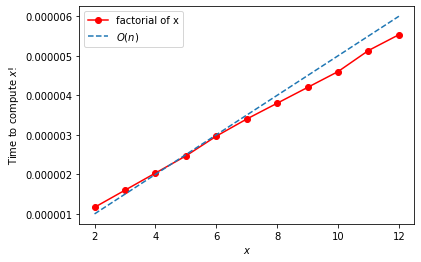

In [155]:
plt.plot(N,factorial_times,'-or', label = 'factorial of x')
plt.plot(N, 5e-7*N, '--', label = '$O(n)$')

plt.xlabel('$x$')
plt.ylabel('Time to compute $x!$')

plt.legend(loc=0)

plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [156]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [157]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [184]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 14)
 
# YOUR CODE HERE
x = np.random.rand(N[-1],N[-1])

det_times = []
for n in N:
    t = %timeit -n3 -q -o np.linalg.slogdet(x[:n,:n])
    det_times.append(t.best)

Plot result:

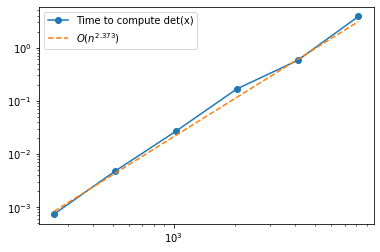

In [195]:
# YOUR CODE HERE

plt.loglog(N[-6:],det_times[-6:],marker = 'o', label = 'Time to compute det(x)')
plt.loglog(N[-6:],1.6e-9*N[-6:]**2.373, '--', label = '$O(n^{2.373})$')

plt.legend(loc=0)
plt.show()